#CIS 5450 Final Project - Credit Card Transactions Fraud Detection

# Part 1: Introduction
*Ryan Zhou, Dan Kim, Eric Moon*

Link to dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

**Objective:**
The project revolves around analyzing a comprehensive dataset of credit card transactions to develop a classification model that can accurately distinguish between legitimate and fraudulent transactions. By employing exploratory data analysis (EDA), modeling techniques, and insightful visualizations, the ultimate objective is to enhance the security and integrity of financial transactions. This project is critical and impactful as it relates to a significant real-world problem of financial fraud that affects hundreds of thousands of people and institutions in the United States annually. By reducing the prevalence of fraudulent transactions, the project has the potential to save substantial amounts of money and make digital transactions safer.

**Approach:**
For this project, we are focusing on classification models to differentiate between genuine and fraudulent credit card transactions. This approach is chosen because credit card transactions fall into two categories: fraudulent or not fraudulent. Consequently, the target variable is categorical, representing the status of each transaction. Specifically, the target variable could be labeled as "is_fraud" with values '0' for legitimate transactions and '1' for fraudulent ones. Moreover, we can use other variables such as transaction amount, transaction time, and transaction location to determine if a transaction is fraudulent or not.

**Anticipated Challenges and Obstacles:**
Anticipated challenges in this project include managing imbalanced datasets because there are significantly more legitimate transactions compared to fraudulent ones. Thus, this can make it harder to develop an accurate model for identifying fraudulent transactions. Additionally, another consideration could be that an individual may make a transaction at an abnormal time of day or with an abnormal amount, which can lead to false positives and false negatives in our model.

**Dataset Overview:**
In our final project, we aim to analyze the most significant indicators of credit card fraud from transactions conducted around the United States in 2019. To accomplish this task, we have imported the dataset cf_df which covers credit cards of 1,000 customers performing transactions with a pool of 800 merchants. The columns of this dataset hold valuable information that we can use to determine which features indicate credit card fraud. For example, the dataset contains information such as transaction date and time, transaction amount, transaction location, cardholder date of birth, whether a transaction is fraudulent, and other insightful features. In the following section, we will clean up our imported dataset to remove columns that are irrelevant to our analysis and reformat the labels to be more interpretable.


#Part 2: Data Loading & Preprocessing


Here, we imported all relevant libraries that would be needed for pre-processing, exploratory data analysis, feature engineering, and model selection and finetuning.

In [ ]:
# Imports + Installs
!pip install category_encoders
!pip install pandasql
import seaborn as sns
import dask.dataframe as dd
import folium
import numpy as np
import copy
from datetime import datetime
from xgboost import XGBRegressor
import xgboost as xgb
from folium.plugins import HeatMap
from google.colab import drive
from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import pandasql as psql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=4d62e28fa91159e38a940f575edf4512b4dc49c93523cc648d6ab9623d892157
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


## 2.1: Load Data

This section focuses on loading the credit card transaction dataset from Kaggle. It mounts the Google Drive to access the Kaggle API credentials (kaggle.json file), downloads the dataset, and unzips it in the Colab environment. Finally, it reads the CSV file into a Pandas DataFrame called 'cf_df' and displays the first few rows and column data types to get an initial understanding of the dataset.

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the kaggle directory and
!mkdir -p ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 97% 195M/202M [00:02<00:00, 102MB/s]
100% 202M/202M [00:02<00:00, 96.9MB/s]


In [ ]:
# Unzip folder in Colab content folder
!unzip /content/fraud-detection.zip

Archive:  /content/fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [ ]:
# TODO: Read the csv file and save it to a dataframe called "cf_df"
cf_df = pd.read_csv('fraudTest.csv')

# Check out the first five rows
cf_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Check out the column types
cf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## 2.2: Data Pre-Processing


This section performs various data preprocessing and feature engineering tasks on the 'cf_df' DataFrame. It begins by converting the transaction timestamp into a datetime format, extracting the date component, and renaming several columns to improve readability and understanding.

In [ ]:
cf_df['trans_date_trans_time']= pd.to_datetime(cf_df['trans_date_trans_time'])
cf_df['trans_date']= cf_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
cf_df['trans_date']=pd.to_datetime(cf_df['trans_date'])
cf_df = cf_df.rename(columns={
    'trans_date_trans_time': 'trans_date_time',
    'cc_num': 'credit_card_number',
    'amt': 'amount',
    'lat': 'latitude',
    'long': 'longitude',
    'merch_lat': 'merchant_latitude',
    'merch_long': 'merchant_longitude',
    'city_pop': 'city_population'
})

In [ ]:
cf_df

,Unnamed: 0,trans_date_time,credit_card_number,merchant,category,amount,first,last,gender,street,...,longitude,city_population,job,dob,trans_num,unix_time,merchant_latitude,merchant_longitude,is_fraud,trans_date
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020-12-31
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020-12-31





We then remove unnecessary columns ('Unnamed: 0', 'trans_num', 'longitude', 'unix_time', 'street', 'gender')
that are not needed for further analysis or processing.



In [ ]:
cf_df.drop("Unnamed: 0",axis=1,inplace=True)
cf_df.drop("trans_num",axis=1,inplace=True)
cf_df.drop("longitude",axis=1, inplace=True)
cf_df.drop("unix_time",axis=1, inplace=True)
cf_df.drop("street",axis=1, inplace=True)
cf_df.drop("gender",axis=1, inplace=True)

The code standardizes merchant names by removing the 'fraud_' prefix using a regular expression and improves category readability by replacing underscores with spaces.

In [ ]:
cf_df['merchant'] = cf_df['merchant'].str.replace('^fraud_', '', regex=True)
cf_df['category'] = cf_df['category'].str.replace('_', ' ')

We then calculate the age of individuals by subtracting the year of birth from the current year and bin the calculated ages into predefined age groups ('0-18', '19-25', '26-35', etc.). This facilitates demographic analysis and understanding of age distribution within the data.

In [ ]:
current_year = datetime.now().year
cf_df['age'] = current_year - pd.to_datetime(cf_df['dob']).dt.year

# Define age bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']

# Categorize ages into bins
cf_df['age_group'] = pd.cut(cf_df['age'], bins=age_bins, labels=age_labels, right=False)


- Categorizes transaction times into parts of the day: Defines a function to assign each transaction to a specific part of the day (Morning, Afternoon, Evening, Night) based on the hour of the transaction. This will help in analyzing transaction patterns over different times of the day.

- Binning hours into intervals: Further categorizes transaction hours into 3-hour intervals (e.g., '0-2', '3-5', etc.), providing a detailed view of when transactions are most frequent. This granularity aids in temporal analysis and can be useful for identifying peak transaction periods.

In [ ]:
# Define a function to categorize the part of the day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

cf_df['part_of_day'] = pd.to_datetime(cf_df['trans_date_time']).dt.hour.apply(part_of_day)
cf_df['hour'] = cf_df['trans_date_time'].dt.hour

# Define bins for 3-hour intervals
bins = [-1, 2, 5, 8, 11, 14, 17, 20, 23]
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23']

# Categorize hours into bins
cf_df['time_group'] = pd.cut(cf_df['hour'], bins=bins, labels=labels)
cf_df.head()

,trans_date_time,credit_card_number,merchant,category,amount,first,last,city,state,zip,...,dob,merchant_latitude,merchant_longitude,is_fraud,trans_date,age,age_group,part_of_day,hour,time_group
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal care,2.86,Jeff,Elliott,Columbia,SC,29209,...,1968-03-19,33.986391,-81.200714,0,2020-06-21,56,56-65,Afternoon,12,12-14
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal care,29.84,Joanne,Williams,Altonah,UT,84002,...,1990-01-17,39.450498,-109.960431,0,2020-06-21,34,26-35,Afternoon,12,12-14
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health fitness,41.28,Ashley,Lopez,Bellmore,NY,11710,...,1970-10-21,40.495810,-74.196111,0,2020-06-21,54,46-55,Afternoon,12,12-14
3,2020-06-21 12:15:15,3591919803438423,Haley Group,misc pos,60.05,Brian,Williams,Titusville,FL,32780,...,1987-07-25,28.812398,-80.883061,0,2020-06-21,37,36-45,Afternoon,12,12-14
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,travel,3.19,Nathan,Massey,Falmouth,MI,49632,...,1955-07-06,44.959148,-85.884734,0,2020-06-21,69,66-75,Afternoon,12,12-14


#Part 3: Exploratory Data Analysis

Before constructing and evaluating any models, we wanted to extract some key insights to learn more about our datasets. In particular, we were curious about how certain columns (features) related to one another and fraudulent transactions in general. To accomplish this, we used a combination of pandas and matplotlib to create some informative plots and graphs.

## 3.1 Comparative Analysis of Normal and Fraudulent Transactions

As part of our endeavor to understand the extent and impact of fraudulent transactions, we present an initial comparative visualization that starkly contrasts the frequency of normal and fraudulent credit card transactions within our dataset. This visual representation serves to lay the groundwork for further exploration into the specifics of transaction fraudulence and to underscore the prevalence of fraud in the context of regular activity.

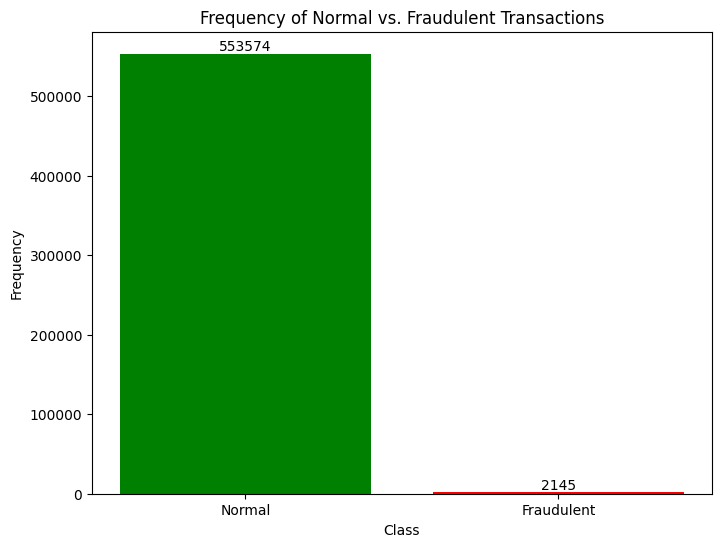

In [ ]:
# Assuming 'is_fraud' is the column indicating whether a transaction is fraudulent (1) or not (0)
fraud_counts = cf_df['is_fraud'].value_counts()

# Setting up labels for the bar chart
labels = ['Normal', 'Fraudulent']
counts = [fraud_counts[0], fraud_counts[1]]  # Assuming 0 is normal and 1 is fraudulent

# Creating the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=['green', 'red'])

# Adding title and labels
plt.title('Frequency of Normal vs. Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Adding number labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


Justification for choice of plot:

* This bar chart provides a clear visual comparison of the frequency of normal and fraudulent transactions within the dataset. Such a comparison is crucial for understanding the scale and distribution of the two classes, which is essential for recognizing the potential challenges posed by class imbalance and for informing subsequent modeling and evaluation strategies.

Takeaways:


*   With normal transactions accounting for 553,574 of the rows and fraudulent claims accounting for 2,145 of the rows, this suggests that while fraud is a significant issue, it remains a relatively small fraction of the total transaction volume.
*   The low frequency of fraudulent transactions highlights the unique challenges faced in effectively identifying fraudulent transactions. Given the sheer volume of normal transactions, it becomes crucial to develop sophisticated methods to identify those few fraudulent activities.

*   By understanding the scale of normal versus fraudulent transactions, we can tailor our analytical approaches to focus on sensitivity, given the rarity of fraud incidents, and ensure robustness against false negatives.






## 3.2 Distribution of Fraud Across Transaction Categories

To gain insights into the operational facets of transaction fraud, we analyze the distribution of fraudulent activities across various transaction categories. The pie chart provides a visual summary of the proportionate prevalence of fraud within each category, enabling us to identify which sectors are more susceptible to fraudulent transactions. This visualization will aid in directing focused security measures where they are most needed and in formulating hypotheses about potential vulnerabilities within transaction categories.

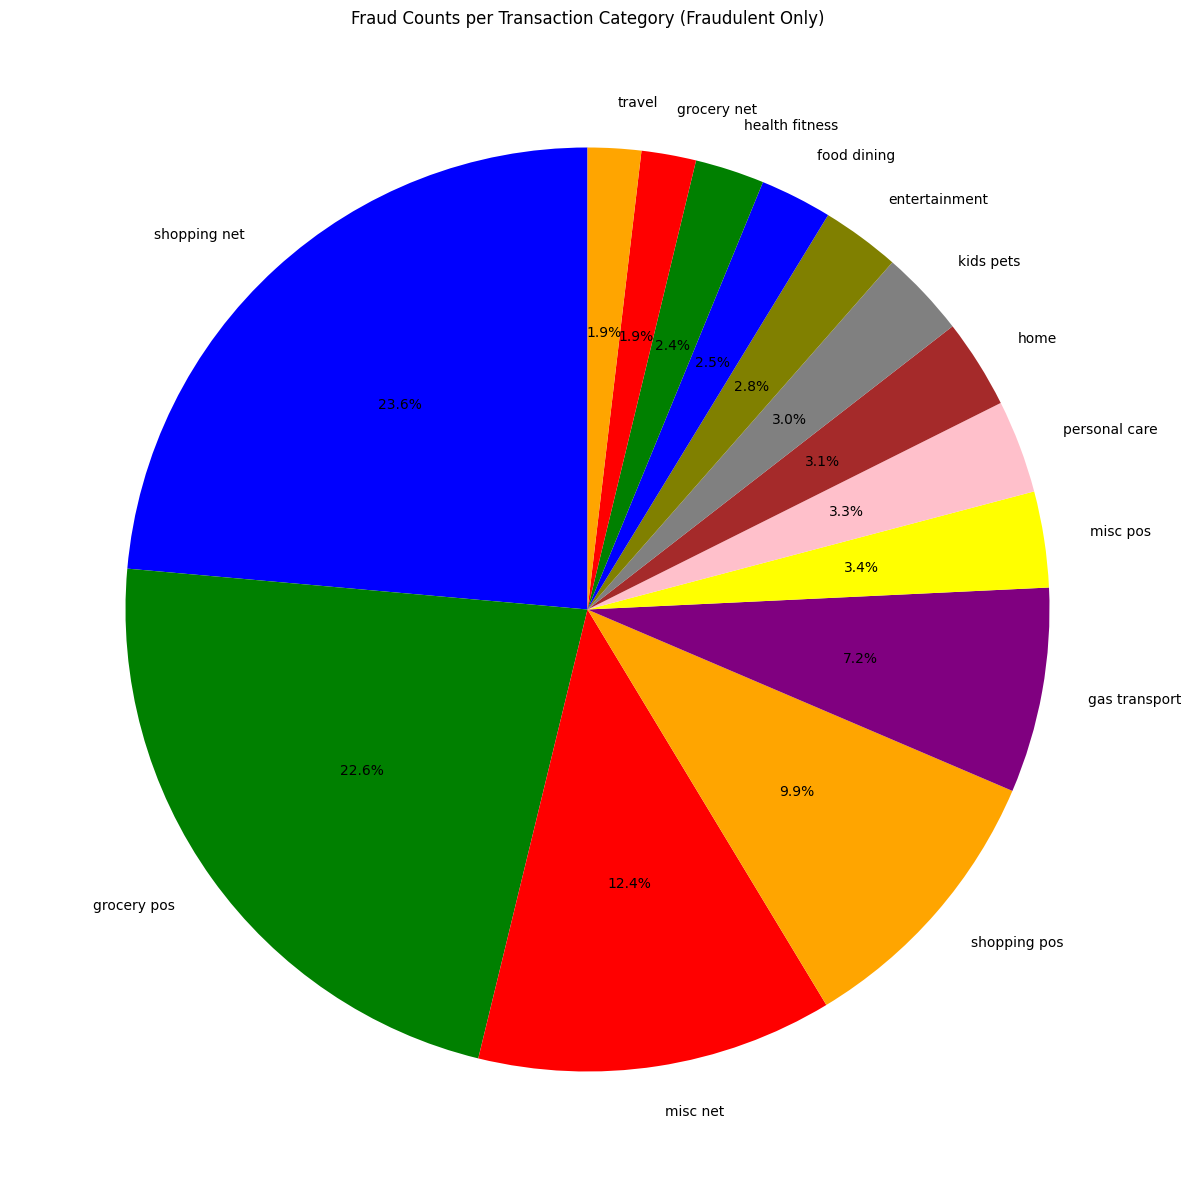

In [ ]:
# Extract the rows that correspond to the fraudulent transactions
fraudulent_transactions = cf_df[cf_df['is_fraud'] == 1]

# Count the number of fraudulent incidents per category
fraud_counts = fraudulent_transactions['category'].value_counts().sort_values(ascending=False)

# Build the pie chart that visualizes the distribution of fradulent incident per category
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'olive']
plt.figure(figsize=(25, 15))
fraud_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Fraud Counts per Transaction Category (Fraudulent Only)')
plt.ylabel('')
plt.show()

Justification for choice of plot:
* We selected a pie chart mainly because it provides an excellent visualization of the distribution of fraudulent transactions across various transaction categories. This visualization would be particularly useful for identifying the categories that are most susceptible to fraud, enabling financial institutions to tailor their strategies based on the specific vulnerabilities or patterns associated with each category.

Takeaways:

* Fraudulent transactions are predominantly concentrated in online shopping and grocery point-of-sale categories, which together account for nearly half of all fraud incidents.
* The wide distribution of fraud across multiple categories underscores the complexity of fraud detection and the need for tailored protective measures across different transaction types
* This distribution also signals potential fraud trends and risk levels to consumers, reinforcing the need for vigilance across all categories of transactions.



## 3.3 Cities and Frequencies of Fraudulent Transactions

Exploring the geographical distribution of fraudulent transactions provides a granular view of urban centers where credit card fraud is most and least prevalent. Our side-by-side bar chart delineates a comparative analysis of the cities with the highest and lowest counts of fraud cases. This visualization aids in identifying potential patterns of fraud that may correlate with certain urban characteristics or in pointing out the efficacy of anti-fraud measures in different locales.

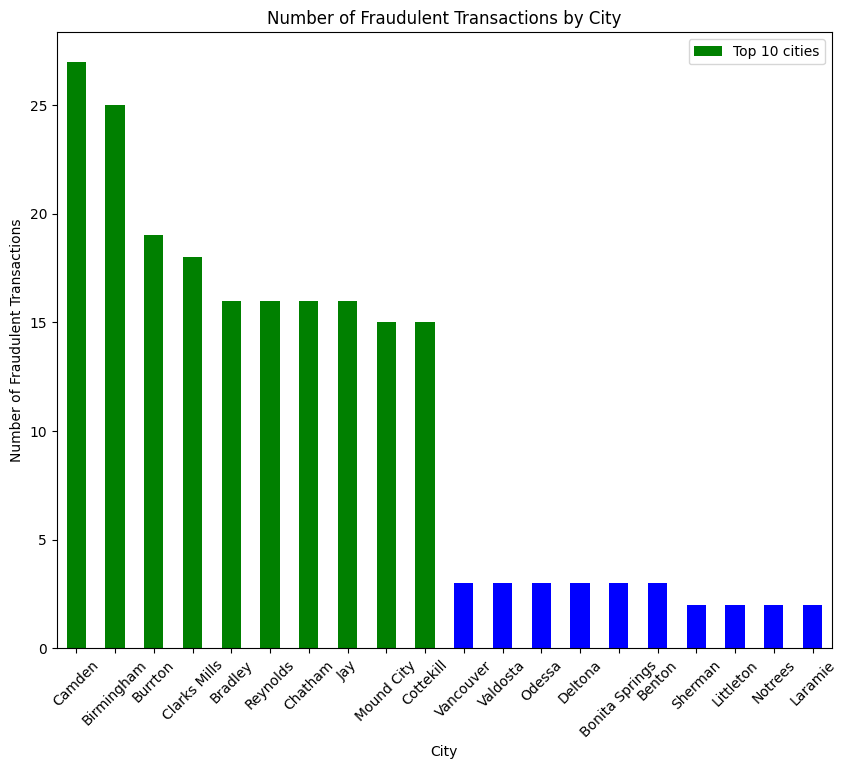

In [ ]:
# Find the size of fraudulent transactions per city
fraud_by_city = fraudulent_transactions.groupby('city').size().sort_values(ascending=False)

# Get top 10 and bottom 10 cities
top_10_cities = fraud_by_city.head(10)
bottom_10_cities = fraud_by_city.tail(10)

# Concatenate the top 10 and bottom 10 cities
top_bottom_cities = pd.concat([top_10_cities, bottom_10_cities])

# Colors - 'green' for top 10, 'blue' for bottom 10
colors = ['green'] * 10 + ['blue'] * 10

# Bar chart
plt.figure(figsize=(10, 8))
top_bottom_cities.plot(kind='bar', color=colors)
plt.title('Number of Fraudulent Transactions by City')
plt.xlabel('City')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.legend(['Top 10 cities', 'Bottom 10 cities'])
plt.show()

Justification for choice of plot:
* We wanted to understand if geography had any correlation with the frequency of fraudulent activities. The choice to have top ten cities and bottom ten cities side-by-side was intended to provide an understanding of how much fraudulent activities affects different areas and give a granular analysis of geographic patterns in fraud occurrences, which can inform targeted fraud prevention measures, resource allocation, and collaborative efforts with local authorities or financial institutions in high-risk areas.


Takeaways:


*   The cities with the highest frequency of fraud, represented in green, possibly share common characteristics that make them attractive targets for fraudulent activities, such as larger population densities or more concentrated commercial activities.
*   Conversely, the cities with the lowest incidence of fraud, shown in blue, could be benefiting from effective preventive measures, lower population densities, or perhaps less credit card usage.
* Financial institutions and stakeholders could leverage this data to focus their efforts on high-risk areas or to learn from cities that have successfully mitigated fraud incidents.



## 3.4 Visualizing the HeatMap of Fraudulent Transactions
Our heat map provides an illustration of credit card fraud density across different states and regions of the United States. Utilizing latitude and longitude data of the merchant locations associated with each fraudulent transaction, we created a gradient representation to visually signify the concentration of fraud activities. This map offers a heat signature, with warmer colors indicating a higher incidence of fraud, thus allowing us to observe both regional patterns and hot spots of fraudulent behavior.

In [ ]:
# Simple count
fraudulent_transactions['intensity'] = 1

# Convert the dataframe to a list of lists where each list contains [latitude, longitude, intensity]
heat_data = fraudulent_transactions[['merchant_latitude', 'merchant_longitude', 'intensity']].values.tolist()

# Create a map centered on a relevant location, here I choose a central U.S. location as an example
m = folium.Map(location=[39.8283, -98.5795], zoom_start=5)  # Center of the U.S.

# Add the heatmap layer to the map
HeatMap(heat_data).add_to(m)

# Display the map
m

<ipython-input-18-16fb822d48fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions['intensity'] = 1


Justification for heat map:
* Not only did we want to visualize the geographical distribution of fraudulent activities, we also wanted identify the main hotspots or clusters of fraudulent activities. Additionally, the heat map can reveal potential spatial correlations or patterns that may be indicative of underlying factors contributing to fraud.


Takeaways:


*   Areas with the most intense colors represent fraud hotspots might be areas with higher commercial activity or those with prevalent credit card usage.
*   The central part of the United States shows less intensity compared to the coasts, possibly reflecting population density and urbanization levels to be factors correlated with fraudulent activities.
* The map can guide preemptive measures by financial institutions to bolster defenses where fraud is most prevalent.



## 3.5 Analyzing Fraudulent Transactions by Age Group
In an effort to understand the age demographics most affected by fraudulent activities, we have segmented and visualized the distribution of fraudulent transactions across different age groups. This bar chart delineates age groups into decadal increments, providing a clear visual representation of which age brackets might be the most susceptible to fraud. Such insights could be important for consumer protection strategies.

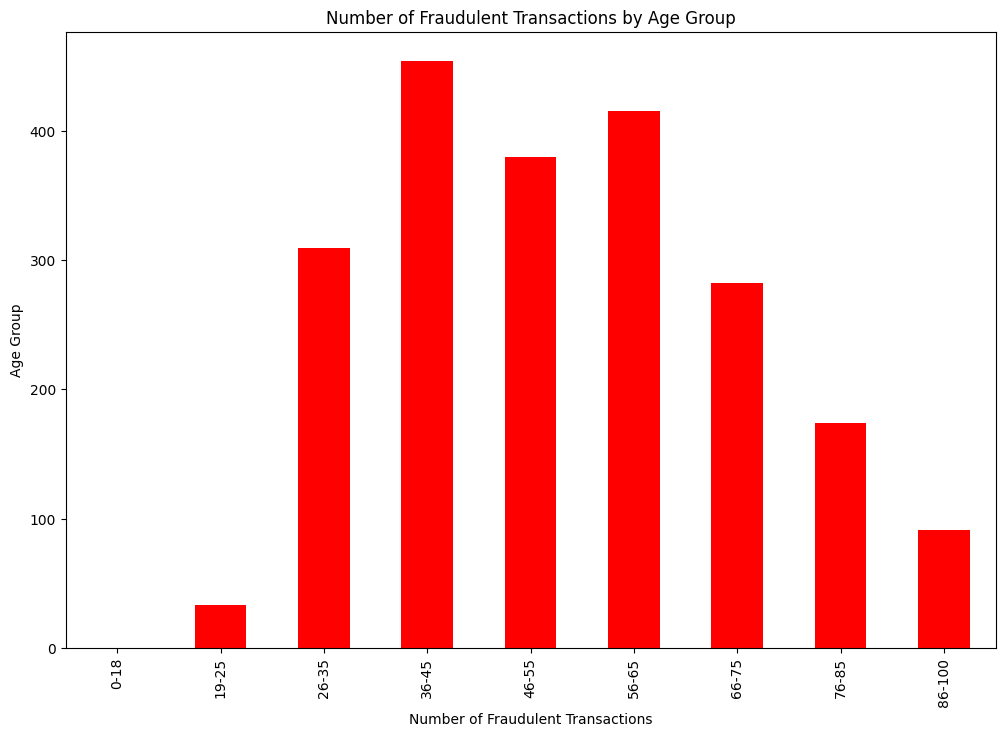

In [ ]:
# Calculate the frequency of fraud by age group
fraud_by_age_group = fraudulent_transactions.groupby('age_group').size()

# Plotting
plt.figure(figsize=(12, 8))
fraud_by_age_group.plot(kind='bar', color='red')
plt.title('Number of Fraudulent Transactions by Age Group')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Age Group')
plt.show()

Justification for choice of plot:
* We believed that a bar chart would emphasize the top age demographics that are most affected by credit card fraud transactions.  Additionally, it can inform risk assessment strategies by considering age as a potential factor in fraud vulnerability.

Takeaways


* Middle-aged individuals, particularly those in the 35-45 and 45-55 age groups, experience the highest incidence of fraudulent transactions.   
* The most affected age groups highlights that people who commit fraud may target individuals who are more likely to have established financial resources and credit history.



## 3.6 Temporal Trends in Fraudulent Transactions

To uncover potential patterns in the timing of fraudulent activities, we have graphed the frequency of fraudulent transactions within designated time intervals throughout the day. This line chart breaks down the day into eight 3-hour segments, from midnight to midnight, allowing us to trace the ebb and flow of fraudulent transaction occurrences as the day progresses. Insights into these temporal patterns could be instrumental for real-time fraud monitoring and preventive measures.

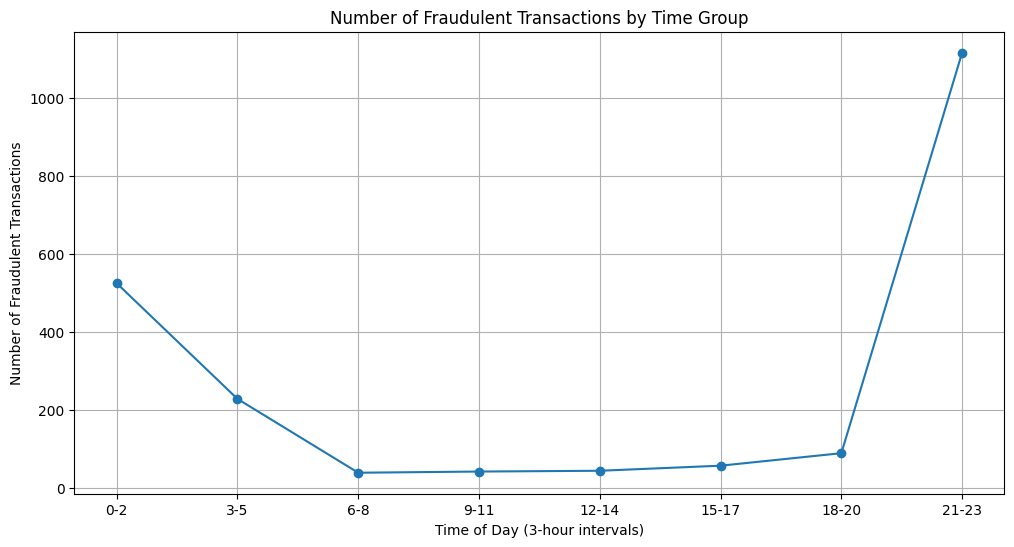

In [ ]:
# Group by the time group and count fraudulent transactions
fraud_by_time_group = fraudulent_transactions.groupby('time_group').size()

# Plotting
plt.figure(figsize=(12, 6))
fraud_by_time_group.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Number of Fraudulent Transactions by Time Group')
plt.xlabel('Time of Day (3-hour intervals)')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.show()

Justification for choice of plot:
* The line chart illustrates the frequency of fraudulent transactions within designated time intervals throughout the day. This visualization can reveal temporal patterns or peak periods of fraud activity, which can guide real-time fraud monitoring efforts and inform the allocation of resources and heightened security measures during high-risk time windows.

Takeaways:


*   The plot indicates that fraudulent activities are most prevalent during later hours of the day, suggesting the need for extra vigilance at these hours. The sudden spike in number of transaction during the periods 18-20 may be seen as an outlier in our graph, but we beleive it can be attributed to higher activity of fraudsters during these hours.
*   A relatively steady low level of fraud from morning to evening could reflect the effectiveness of fraud detection mechanisms during higher traffic periods or could be a consequence of the transaction patterns of the cardholders.
* The chart indicates critical periods when anti-fraud measures could be intensified, especially during the significant spike in the late evening, potentially adjusting fraud alert thresholds during these high-risk times.



##3.7 Analyzing Fraudulent Transactions by Transaction Amount

We also wanted to understand the distribution of fraudulent transactions across different transaction amount ranges to provide valuable insights into the potential risk factors and patterns associated with credit card fraud. This analysis can help identify the amount ranges that are most susceptible to fraudulent activities, enabling financial institutions to implement targeted monitoring and prevention strategies.


In [ ]:
# PandasSQL query to retrieve the distribution of fraudulent transactions by transaction amount ranges
query = """
SELECT
    CASE
        WHEN amount < 100 THEN 'Below $100'
        WHEN amount >= 100 AND amount < 500 THEN '$100 - $499'
        WHEN amount >= 500 AND amount < 1000 THEN '$500 - $999'
        ELSE '$1000 and above'
    END AS amount_range,
    COUNT(*) AS fraud_count
FROM cf_df
WHERE is_fraud = 1
GROUP BY amount_range
ORDER BY fraud_count DESC;
"""

# Execute the query
fraud_amount_distribution = psql.sqldf(query)

# Display the results
print("Distribution of Fraudulent Transactions by Transaction Amount Ranges:")
print(fraud_amount_distribution)

Distribution of Fraudulent Transactions by Transaction Amount Ranges:
      amount_range  fraud_count
0      $500 - $999          760
1      $100 - $499          629
2       Below $100          480
3  $1000 and above          276


Takeaways:


*   The results indicate that the highest number of fraudulent transactions (760) falls within the "$500 - $999" range.
*   The "$100 - $499" range also exhibits a considerable number of fraudulent transactions (629), indicating that mid-range transactions are also vulnerable to fraud.
* While the "Below $100" range has a lower number of fraudulent transactions compared to the higher ranges, it still represents a significant portion of the overall fraud incidents. This highlights the importance of not overlooking low-value transactions in fraud detection efforts, as they can collectively contribute to substantial losses.



## 3.8 Building a Feature Correlation Matrix
The correlation heatmap provides a visual representation of the relationships between different features in the dataset. This visualization can help identify potential multicollinearity issues, which can impact model performance and interpretability. Additionally, it can reveal insights into the strength and direction of correlations between features and the target variable (fraudulent transactions), informing feature selection and engineering strategies.


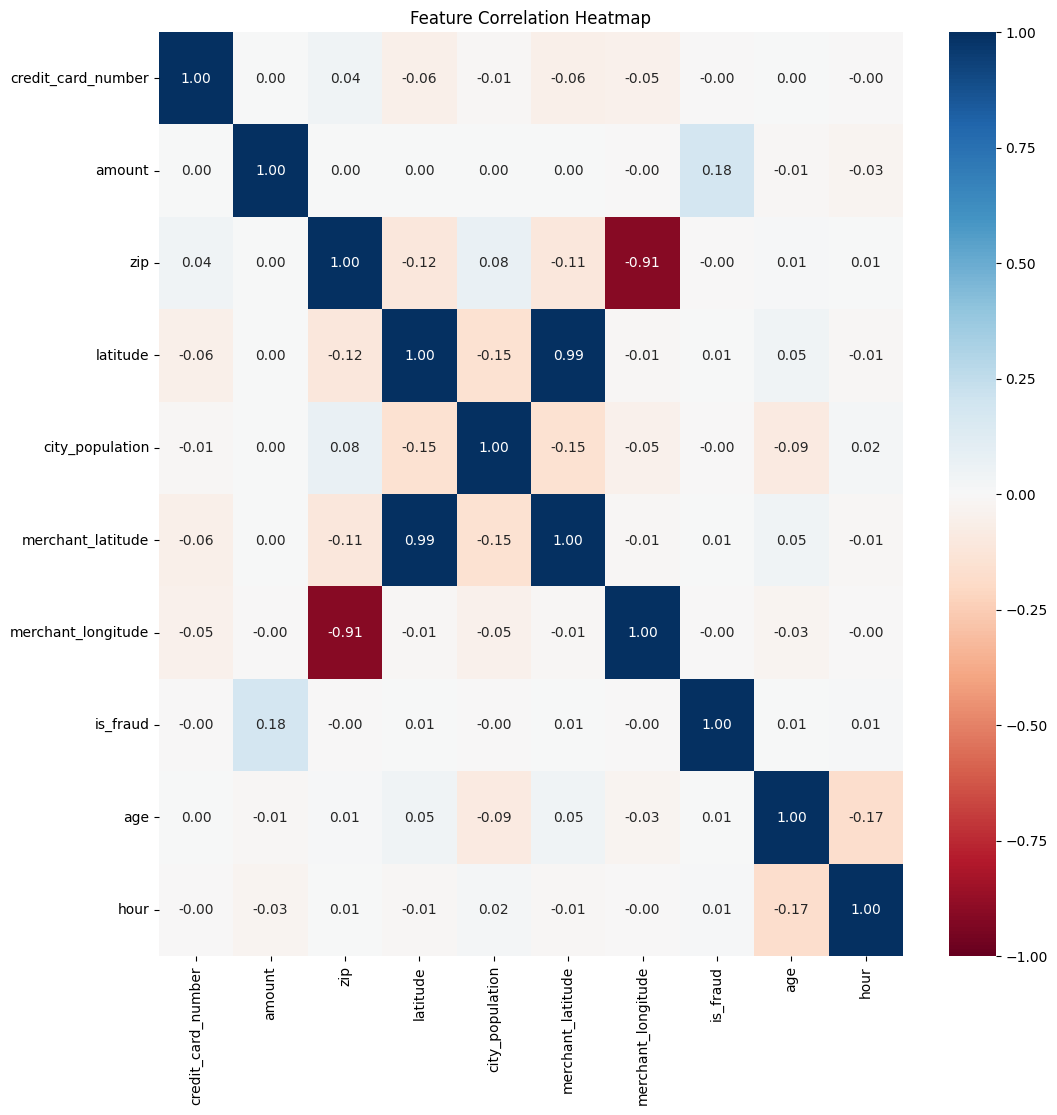

In [ ]:
# Select only the numeric features for the correlation matrix
numeric_cols = cf_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(data=corr_matrix, cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

Takeaways:
* Higher correlation between is_fraud and amount
* High negative correlation between 'zip' and 'latitude' and 'longitude' indicates a strong geographical clustering, which is logical since ZIP codes are area-specific. A similar negative correlation between 'zip' and 'merchant_longitude' and 'merchant_latitude' reinforces this geographical linkage.
* The 'city_population' feature appears to be quite independent of other features, with mostly low correlation values, suggesting that the size of a city's population might not directly influence other variables in the context of fraud.
* The 'unix_time' feature also shows very low correlation with other features, implying that the specific timestamps of transactions don't have a direct linear relationship with the other variables.
* The 'hour' has a slight negative correlation with 'is_fraud', hinting at the possibility that certain times of the day may have a lower frequency of fraud, but the relationship is not strong enough to draw definitive conclusions.

#Part 4: Feature Engineering and Preprocessing

In order to to train a model we need to ensure that our training data and test data is standardized. We also need to ensure that the data is in a format that is easy for the model to understand, which is what we strive to do in this section.

##4.1 Feature Engineering
In this section, we perform feature engineering to extract additional relevant features from the existing data.

### 4.1.1 Time-based Features

 We will use trans_date_time attributes to create three new columns ('day_of_week', 'month', 'hour_of_day') by extracting different components of the date and time. We want to see if the instance of a day, week, or month is indicative of fraudulent activities.

In [ ]:
cf_df['day_of_week'] = cf_df['trans_date_time'].dt.day_name()
cf_df['month'] = cf_df['trans_date_time'].dt.month
cf_df['hour_of_day'] = cf_df['trans_date_time'].dt.hour

###4.1.2 Amount-based Features

Transaction amounts can be indicative of fraud. Therefore, we create new new feature:
* 'amount_category': Binning transaction amounts into categories like 'low', 'medium', 'high', and 'very high'. This can help identify patterns specific to different amount ranges.




In [ ]:
cf_df['amount_category'] = pd.cut(cf_df['amount'], bins=[0, 100, 500, 1000, 5000], labels=['low', 'medium', 'high', 'very high'])

###4.1.3 Frequency-based Features
Frequency of transactions can be indicative of suspicious activity. That is, a high frequency of transactions for a particular cardholder in a given day might be suspicious and warrant further investigation.. Therefore, we sought to find the number of transactions grouped by date. We create the 'daily_transaction_count' feature, which counts the number of transactions per day for each credit card number.




In [ ]:
cf_df['date'] = cf_df['trans_date_time'].dt.date
cf_df['daily_transaction_count'] = cf_df.groupby('credit_card_number')['date'].transform('count')

###4.1.4: Transaction-based Features

These features derive from the transaction data and can help capture more nuances in spending patterns. Here, we wanted to extract two new features:

1. 'rolling_avg_amt': Calculates the average transaction amount over the last N days (e.g., 7 days) for each credit card number. Unusual spikes in transaction amounts compared to the rolling average could indicate potential fraud.
2. 'diff_from_avg': Calculates the difference between the current transaction amount and the rolling average. Significant deviations from the average might suggest suspicious activity.

In [ ]:
# Average transavtion amount in the last N Days
N = 7 # last 7 days
cf_df['rolling_avg_amt'] = cf_df.groupby('credit_card_number')['amount'].transform(
    lambda x: x.rolling(window=N, min_periods=1).mean()
)

# Difference from average transaction
cf_df['diff_from_avg'] = cf_df['amount'] - cf_df['rolling_avg_amt']

###4.1.5 Categorical Aggregates
These features are aggregated metrics grouped by categorical variables.

1. 'avg_amount_by_merchant': Calculates the average transaction amount for each merchant. Transactions deviating significantly from the merchant's average could be flagged as potential fraud.
2. 'txn_count_by_cat_city': Counts the number of transactions for each category and city combination. This feature can help capture local and categorical trends in fraudulent activities.

In [ ]:
# Average Transaction Amount by Merchant
cf_df['avg_amount_by_merchant'] = cf_df.groupby('merchant')['amount'].transform('mean')

# Count of Transactions by Category and City
cf_df['txn_count_by_cat_city'] = cf_df.groupby(['category', 'city'])['amount'].transform('count')

In [ ]:
# we drop the 'credit_card_number' column as it is not needed for modeling and could potentially introduce noise or biases
cf_df.drop("credit_card_number",axis=1,inplace=True)

## 4.2 Preprocessing
Before feeding the data into machine learning models, we need to preprocess it to handle categorical variables and ensure that the features are on a consistent scale. This step is crucial for improving model performance and preventing biases towards features with larger magnitudes.


###4.2.1 One Hot Encoding
We apply one-hot encoding to the categorical variables ('category', 'state', 'amount_category') in our dataset. One-hot encoding allows us to create binary columns for each unique category, allowing the model to treat them as numerical features.


In [ ]:
numerical_cols = cf_df.select_dtypes(include=['number'])
num_numerical_cols = numerical_cols.shape[1]

print(f"Number of numerical columns: {num_numerical_cols}")

Number of numerical columns: 16


In [ ]:
categorical_features = ['category', 'state', 'amount_category']  # example categorical columns

# convert boolean columns to integers (0 and 1)
cf_df_encoded = pd.get_dummies(cf_df, columns=categorical_features)
for column in cf_df_encoded.columns:
    if cf_df_encoded[column].dtype == 'bool':
        cf_df_encoded[column] = cf_df_encoded[column].astype(int)


###4.2.2 Splitting the data
To prepare our dataset for machine learning model training and testing, we will follow several key steps to ensure that our data is appropriately structured and divided:

* Feature Set (X): We will remove the 'is_fraud' column from the cf_df_encoded DataFrame to form our feature set X. This set, consisting of all columns except the target, is crucial for training our model to identify patterns indicative of fraudulent transactions.
* Target Variable (y): Simultaneously, we will extract the 'is_fraud' column and use it as our target variable y. This series indicates whether each transaction is fraudulent (1) or not (0), serving as the outcome our model will predict based on the input features.

To ensure that our model can generalize well to new, unseen data, we will split our data into training and test sets. 80% of the data will be used for training the model, while the remaining 20% will be used for testing.

In [ ]:
X = cf_df_encoded.drop('is_fraud', axis=1)
y = cf_df_encoded['is_fraud']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###4.2.3 Feature Scaling and Dimensionality Reduction

We scale the numeric features in the training and testing sets to ensure that all features contribute equally to the model's predictions and ensure that the model does not get skewed toward variables with higher magnitude. To accomplish this, we perform these steps:

1. We apply StandardScaler to normalize the numeric features by subtracting the mean and scaling to unit variance. This is needed to help us prevent features with larger magnitudes from dominating the model.
2. Perform PCA to reduce the dimensionality of the data and complexity of the model.

By retaining a subset of the principal components that capture most of the variance in the data, we can reduce the complexity of the model, improve computational efficiency, and potentially mitigate overfitting.

In [ ]:
# Select the numeric features
numeric_features_train = X_train.select_dtypes(include=[np.number])
numeric_features_test = X_test.select_dtypes(include=[np.number])

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(numeric_features_train)
X_test_scaled = scaler.transform(numeric_features_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
numeric_features_test

,amount,zip,latitude,city_population,merchant_latitude,merchant_longitude,age,hour,month,hour_of_day,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,amount_category_low,amount_category_medium,amount_category_high,amount_category_very high
119106,1.07,6441,41.4682,5438,41.240083,-71.837788,60,7,8,7,...,0,0,0,0,0,0,1,0,0,0
179292,94.99,74047,35.8896,7163,35.156537,-95.806648,42,14,8,14,...,0,0,0,0,0,0,1,0,0,0
540729,31.28,64630,40.0290,602,39.888665,-93.106804,70,16,12,16,...,0,0,0,0,0,0,1,0,0,0
374360,73.06,74047,35.8896,7163,36.734101,-96.737345,42,10,11,10,...,0,0,0,0,0,0,1,0,0,0
314574,9.99,51521,41.4768,2036,40.922072,-94.899388,53,1,10,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444284,8.22,52563,41.1826,1583,41.496857,-91.453971,25,12,12,12,...,0,0,0,0,0,0,1,0,0,0
89444,205.69,44233,41.2419,7646,41.813370,-81.627877,36,21,7,21,...,0,0,0,0,0,0,0,1,0,0
298536,277.63,1844,42.7280,47249,42.779729,-70.896452,44,1,10,1,...,0,0,0,0,0,0,0,1,0,0
301993,13.29,41254,37.8795,571,37.449586,-82.853977,93,4,10,4,...,0,0,0,0,0,0,1,0,0,0


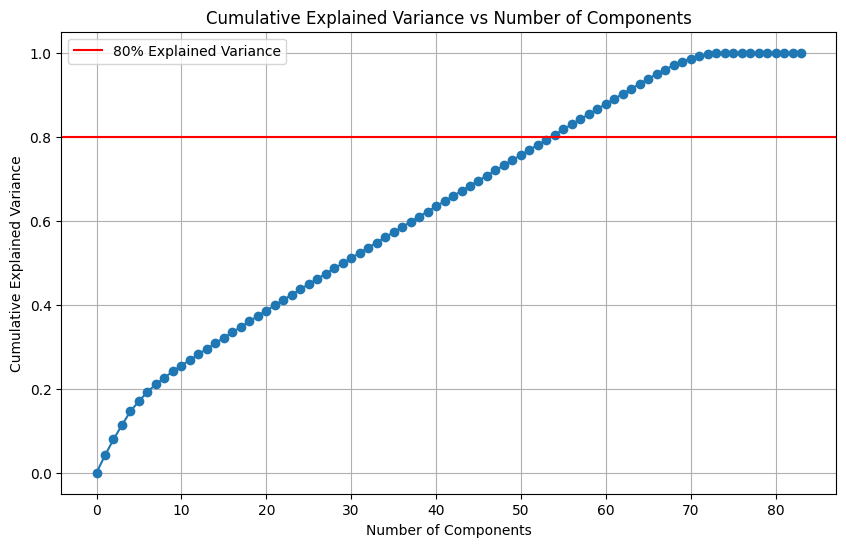

In [ ]:
# Initializing the explained_variance_ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Calculating the cumulative sum of explained variance ratios
cum_evr = np.cumsum(explained_variance_ratios)
cum_evr = np.insert(cum_evr, 0, 0)  # Inserting a zero at the beginning for correct alignment

# Creating a plot
plt.figure(figsize=(10, 6))  # Set a figure size for better readability
plt.plot(cum_evr, marker='o')  # Using a marker for each point
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Explained Variance')  # Red line for 80% variance
plt.xticks(np.arange(0, len(cum_evr), 10), np.arange(0, len(cum_evr), 10))
plt.grid(True)
plt.legend()
plt.show()

Takeaway:
* From the plot, we can determine that we require 53 principal components to achieve an intersection with our 80% variance threshold. We then use these 53 components to transform the training and testing data.

In [ ]:
pca_final = PCA(n_components = 53)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

### 4.2.4 Handling Class Imbalance

One of the challenges with this dataset is the class imbalance, where there are significantly more non-fraudulent transactions (majority class) than fraudulent transactions (minority class). Class imbalance can lead to biased models that tend to favor the majority class, resulting in poor performance in detecting the minority class (fraudulent transactions).

To address this, we used  Synthetic Minority Over-sampling Technique (SMOTE), which is an over-sampling technique that creates synthetic instances of the minority class by interpolating between existing minority instances. This helps to balance the classes in the training data, enabling the model to learn patterns from both classes more effectively.

We apply SMOTE to the scaled training data (X_train_pca) and the corresponding target variable (y_train). This step generates a new balanced training set (X_train_pca_smote, y_train_pca_smote) that will be used to train the machine learning models.


In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca, y_train)

#Part 5: Modeling

Now that we extracted key features and preprocessed our data, we can start to construct our model and select the best model for our data.

## 5.1 Logistic Regression (Baseline)

We start by training a logistic regression model, which is a commonly used algorithm for binary classification problems. Logistic regression models the probability of an instance belonging to a particular class (in our case, fraudulent or not) as a function of the input features.

###5.1.1 Logistic Regression (SMOTE)

We train the logistic regression model on the SMOTE-balanced training data (X_train_pca_smote, y_train_pca_smote) and evaluate its performance on the original scaled test set (X_test_pca, y_test). We used this as our baseline since we've learned in class that logistic regression is well suited for binary classification problems such as this one.

In [ ]:
# Initialize and train logistic regression model on SMOTE data
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca_smote, y_train_pca_smote)

# Predict on the original scaled test set
y_pred = logistic_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# To explicitly print the quadrants of the confusion matrix:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

Accuracy: 0.9390790326063485
Confusion Matrix:
 [[103998   6720]
 [    51    375]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    110718
           1       0.05      0.88      0.10       426

    accuracy                           0.94    111144
   macro avg       0.53      0.91      0.53    111144
weighted avg       1.00      0.94      0.97    111144

True Positives (TP): 375
False Positives (FP): 6720
False Negatives (FN): 51
True Negatives (TN): 103998


**Results & Assessment:**


*   We can see that we achieved an accuracy of around 93% and a recall score of 88%
*   Although accuracy is a helpful metric in determining the overall correctness of our model, we wanted to focus more on the recall score which measures the proportion of actual fraudulent transactions that were correctly identified by the model. This is because a high recall rate ensures that the model is capable of identifying most of the fraudulent transactions made which is important because missing a fraudulent transaction can have a significantly larger financial impact than incorrectly determining a non-fraud transaction as fraud.




### 5.1.2 Logistic Regression (Class Weights)
To further improve the model's performance on the minority class (fraudulent transactions), we train another logistic regression model with a class weight adjustment. This adjustment assigns higher weights to the minority class during training, effectively increasing the model's focus on correctly identifying fraudulent transactions.

In [ ]:
# Logistic regression with class weight adjustment
log_reg_weighted = LogisticRegression(class_weight='balanced')

# Fit the model on the scaled training data
log_reg_weighted.fit(X_train_pca, y_train)

# Predict on the scaled test data
y_pred_weighted = log_reg_weighted.predict(X_test_pca)

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
report_weighted = classification_report(y_test, y_pred_weighted)

print("Accuracy with Weighted Classes:", accuracy_weighted)
print("Confusion Matrix with Weighted Classes:\n", conf_matrix_weighted)
print("Classification Report with Weighted Classes:\n", report_weighted)

# To explicitly print the quadrants of the confusion matrix:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

Accuracy with Weighted Classes: 0.936775714388541
Confusion Matrix with Weighted Classes:
 [[103741   6977]
 [    50    376]]
Classification Report with Weighted Classes:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    110718
           1       0.05      0.88      0.10       426

    accuracy                           0.94    111144
   macro avg       0.53      0.91      0.53    111144
weighted avg       1.00      0.94      0.96    111144

True Positives (TP): 375
False Positives (FP): 6720
False Negatives (FN): 51
True Negatives (TN): 103998


**Results & Assessment:**

* This model achieved an accuracy of 0.926 and a recall score of 0.89.
* By doing this the model was more sensitive to the minority class. But from our analysis, we can see that there was not much of a significant difference between the logistic regression models in terms of performance.


**Limitations of Logistic Regression**

* Linearity Assumption: Logistic Regression assumes a linear relationship between the independent variables and the log odds of the dependent variable. This can limit its effectiveness in complex scenarios where relationships are non-linear.
* Feature Scaling Dependency: While logistic regression requires feature scaling to perform well, it can be sensitive to the effects of irrelevant or highly correlated features.
* Biases:
  * Omitted Variable Bias: If important variables are omitted, the model can produce biased and inconsistent estimates of other parameters.
  * Sample Bias: If the training data is not representative of the population, the model can produce biased predictions that do not generalize well.

##5.2 XGBoost

Next, we explore the use of XGBoost, a powerful ensemble learning algorithm that combines multiple decision tree models to achieve better predictive performance.

XGBoost is known for its ability to handle various data types, automatically capture non-linear relationships, and provide feature importance scores, good for classification and regression tasks.

We define the parameters for the XGBoost model, including the maximum depth of the trees (max_depth), the learning rate (eta), the objective function (binary logistic regression for binary classification), and the evaluation metric (AUC-PR, which is a suitable metric for imbalanced datasets). We also create DMatrix objects for the training and testing data, which are required by XGBoost for model training and evaluation.

In [ ]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_pca_smote, label=y_train_pca_smote)
dtest = xgb.DMatrix(X_test_pca, label=y_test)

# Define parameters
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict the probabilities
y_pred_proba = bst.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy_xg = accuracy_score(y_test, y_pred)
conf_matrix_xg = confusion_matrix(y_test, y_pred)
report_xg = classification_report(y_test, y_pred)

print("Accuracy with Weighted Classes:", accuracy_xg)
print("Confusion Matrix with Weighted Classes:\n", conf_matrix_xg)
print("Classification Report with Weighted Classes:\n", report_xg)

# To explicitly print the quadrants of the confusion matrix:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

Accuracy with Weighted Classes: 0.9888882890664363
Confusion Matrix with Weighted Classes:
 [[109527   1191]
 [    44    382]]
Classification Report with Weighted Classes:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    110718
           1       0.24      0.90      0.38       426

    accuracy                           0.99    111144
   macro avg       0.62      0.94      0.69    111144
weighted avg       1.00      0.99      0.99    111144

True Positives (TP): 375
False Positives (FP): 6720
False Negatives (FN): 51
True Negatives (TN): 103998


**Results & Assessment:**
* We realize from the end of our model implementations, XGboost had the best overall performance compared to all our models. This could be attributed to the fact that the model is known to be highly efficient and flexible by offering extensive tuning parameters to optimize performance. For example, we found that using a max_depth limit of 5 produced the best results. We also know that XGBoost uses a gradient boosting framework which builds trees in a sequence such that each new tree helps to correct the errors made by the previous trees, which could also explain the improved performance over the other models.


**Limitations of XGBoost**
* Overfitting: Despite built-in mechanisms to control overfitting, XGBoost can still overfit the data if the hyperparameters are not set correctly (e.g., too deep trees or too many trees).
* Complexity: Requires careful tuning of several hyperparameters and can be computationally intensive, especially with large datasets and a large number of boosting rounds.
* Potential biases:
  * Bias towards dominant classes: In imbalanced datasets, XGBoost can develop a bias towards the majority class unless parameters like scale_pos_weight are carefully tuned.
  * Data Preprocessing Dependencies: Like many tree-based models, while XGBoost handles a mix of feature types well, improper preprocessing can lead to biases, particularly if categorical variables are not encoded appropriately.


## 5.3 Random Forest

The second model that we used was a random forest algorithm, which is another ensemble learning method that is often used for these types of classification tasks. It works by constructing multiple decision trees at the time of training and outputs the class that is the most commonly predicted by the individual trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Adjust class weights more favorably towards the minority class
rf_classifier = RandomForestClassifier(n_estimators=40, max_depth=6, random_state=42)  # Adjust weights as needed

# fit the random forest classifier onto our pca smote data
rf_classifier.fit(X_train_pca_smote, y_train_pca_smote)

RandomForestClassifier(max_depth=6, n_estimators=40, random_state=42)

In [ ]:
# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_pca)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy of Random Forest:", accuracy_rf)
print("Confusion Matrix of Random Forest:\n", conf_matrix_rf)
print("Classification Report of Random Forest:\n", report_rf)

# To explicitly print the quadrants of the confusion matrix:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

Accuracy of Random Forest: 0.9783344130137479
Confusion Matrix of Random Forest:
 [[108369   2349]
 [    59    367]]
Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    110718
           1       0.14      0.86      0.23       426

    accuracy                           0.98    111144
   macro avg       0.57      0.92      0.61    111144
weighted avg       1.00      0.98      0.99    111144

True Positives (TP): 375
False Positives (FP): 6720
False Negatives (FN): 51
True Negatives (TN): 103998


**Results and Assessment:**
* We iteratively tuned our parameters to get a balance of high performance while achieving a reasonable runtime and not straining out computers' RAM deficiencies. Based on the results of mutliple trials, we settled on the parameters demonstrated in our code as the optimal balance. From this, we can see that the random forest had a marginally better accuracy score than logistic regression, but the recall score remains similar.

**Limitations of Random Forest**

* Model Size: Random Forest models can become quite large and may require significant memory/storage. The ensemble nature of the model involves multiple trees, which can also make them computationally intensive to train and slow at making predictions.
* Interpretability: While individual decision trees are interpretable, a forest of them is not. This makes it hard to understand the relationship between input variables and predictions directly from the model.
* Potential biases:
  * Bias from Bootstrap Sampling: The random sampling of data points with replacement (bootstrap sampling) can introduce bias. For example, if certain minority classes are under-represented in the random samples, the forest might be biased towards the majority class.
  * Correlation Bias: If certain features are highly correlated, the forest might lean heavily on one of the correlated features, which can reduce the model's robustness to changes in that feature.

# Part 6: Conclusion

**Main takeaways**
* The exploratory data analysis revealed valuable insights into the distribution and patterns of fraudulent transactions, including the identification of high-risk transaction categories, geographic hotspots, and temporal patterns.
* Feature engineering techniques, such as creating time-based, amount-based, frequency-based, and categorical aggregate features, played a crucial role in capturing nuanced information and enhancing the model's ability to detect fraudulent activities.
* Addressing the class imbalance issue through techniques like SMOTE (Synthetic Minority Over-sampling Technique) was essential for improving the model's performance in detecting the minority class (fraudulent transactions).
* The evaluation of multiple models, including logistic regression (with and without class weight adjustment) and XGBoost, provided a comprehensive understanding of their strengths and weaknesses in the context of fraud detection.
* The analysis of evaluation metrics, such as the confusion matrix, precision, recall, and F1-score, highlighted the trade-offs between minimizing false positives (which may inconvenience legitimate customers) and false negatives (which may lead to financial losses due to undetected fraud).

**Implications of modeling result**
* The identification of high-risk transaction categories and amount ranges can inform targeted fraud prevention strategies, enabling financial institutions to allocate resources more effectively and implement enhanced monitoring and verification processes for these specific segments.
* The geographical insights derived from the heat map and city-level analysis can guide collaborative efforts with local authorities, financial institutions, and merchants in high-risk areas, fostering a coordinated approach to mitigate fraud risks.
* The temporal patterns identified in fraudulent transactions can inform real-time fraud monitoring efforts, allowing for the adjustment of security measures and resource allocation during peak periods of fraud activity.
* The analysis of feature correlations and the potential for multicollinearity can guide feature selection and engineering strategies, leading to more robust and interpretable models for fraud detection.
* The trade-off between precision and recall highlighted by the evaluation metrics necessitates careful consideration of business objectives and the relative impact of false positives and false negatives, enabling financial institutions to strike the appropriate balance between customer convenience and fraud prevention.
* The model results and insights derived from this analysis can inform the development of comprehensive fraud detection strategies, combining data-driven approaches, targeted preventive measures, and continuous monitoring and adaptation to evolving fraud patterns.


**Strategies to Mitigate Limitations**
* Cross-Validation: Helps ensure that the model generalizes well across different subsets of the data and is not just tailored to one specific set.
* Feature Engineering and Selection: Improving the quality and selection of features can mitigate issues with model biases and limitations.
* Hyperparameter Tuning: Systematic tuning (e.g., using GridSearchCV) can help find the optimal settings to balance bias and variance in the models.
* Ensemble Techniques: Using ensemble methods or combining models can sometimes offset the biases inherent in individual models by bringing different perspectives.

By being aware of these limitations and potential biases, you can better prepare your data, select appropriate models, and tune them to your specific needs, improving both the performance and reliability of your predictive models.


**Challenges and Limitations**
* We encountered several challenges and limitations during our project. Firstly, we had to find the right balance between using the features we want to fine-tune our model and maintaining optimal number of components for pca at 80 percent variance. This is due to the fact that our system ram was capped and more features meant that more ram was taken up and we wouldn’t be able to run PCA on the optimal number of components. Similarly, one hot encoder uses a lot os system ram and the more categorical features we had, the more ram one hot encoder took so we had to find the right balance. Additionally, due to the long time it takes for the models to run, fine-tuning the models with the optimal parameters became a challenge as for every change we made we had to wait roughly five to ten minutes to get results.

**Potential Future Next Steps**
* Some potential future steps for our project include further fine-tuning our models for better performance and accuracy with the goal of maximizing recall. Testing and implementing various classification models to evaluate performance between different models and their limitations. Lastly, we can incorporate additional datasets and merge it with our current dataset to extract further relevant features that can improve our models and analysis.
